<a href="https://colab.research.google.com/github/LCaravaggio/NLP/blob/main/07_TopicModelling/CV_y_TFIDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Information Retrieval

In [97]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from matplotlib import pyplot as plt
import numpy as np

<img src="https://github.com/deeplearning-itba/NLP-Tecnicas-Tradicionales/blob/master/tf.png?raw=1" >
<img src="https://github.com/deeplearning-itba/NLP-Tecnicas-Tradicionales/blob/master/idf.png?raw=1" >
<img src="https://github.com/deeplearning-itba/NLP-Tecnicas-Tradicionales/blob/master/tfidf.png?raw=1" >

Cargamos el 20 Newsgroup, un corpus muy usado en NLP. Es una suerte de foro de internet.

Página oficial: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

In [98]:
TNG_train = fetch_20newsgroups(subset="train",remove=('headers', 'footers', 'quotes'))

In [99]:
TNG_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [100]:
TNG_train.data[0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

In [101]:
TNG_train.target[0]

7

In [102]:
TNG_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [103]:
# Se trata de un corpus con 11314 documentos
len(TNG_train.data)

11314

In [104]:
# Le hacemos primero un CountVectorizer con Ngramas de N=1 es decir, unigramas.
# El hiperparámetro ngram_range indica el mínimo y el máximo del ngrama. (1,1) significa unigrama. (1,2) significa unigramas y bigramas. (2,2) significa solo bigramas. Etc.
cv = CountVectorizer(ngram_range=(1,1), max_df=0.85, min_df=5, max_features=None, stop_words="english")

In [105]:
# Aprende el diccionario y devuelve la matríz término-documento (document-term)
TNG_cv = cv.fit_transform(TNG_train.data)

In [106]:
#Tamaño del vocabulario
print(f'El vocabulario es: {cv.get_feature_names_out()}')
print(f'El tamaño del vocabulario es: {len(cv.get_feature_names_out())}')

El vocabulario es: ['00' '000' '0000' ... 'zx' 'zy' 'zz']
El tamaño del vocabulario es: 17797


In [108]:
# Por ejemplo la palabra "lunatic" es la palabra 10000
cv.get_feature_names_out()[10000]

'lunatic'

In [110]:
# La matríz aprendida es la siguiente:
# (# de documento, palabra) Frecuencia de la palabra
# Vemos que por ejemplo, la palabra "wondering" (37946) aparece 1 vez en el documento 0, y la palabra "car" (8308) aparece 4 veces
print(TNG_cv[0])

  (0, 17413)	1
  (0, 6265)	1
  (0, 3531)	4
  (0, 14152)	1
  (0, 5053)	1
  (0, 5784)	1
  (0, 15084)	1
  (0, 9923)	1
  (0, 9579)	1
  (0, 1002)	1
  (0, 5967)	1
  (0, 1131)	1
  (0, 3457)	1
  (0, 5785)	1
  (0, 13219)	1
  (0, 14807)	1
  (0, 1704)	1
  (0, 3329)	1
  (0, 14401)	1
  (0, 13657)	1
  (0, 3067)	1
  (0, 9449)	1
  (0, 10683)	1
  (0, 6245)	1
  (0, 15007)	1
  (0, 17669)	1
  (0, 12688)	1
  (0, 8143)	1
  (0, 8701)	1
  (0, 7313)	1
  (0, 9924)	1
  (0, 10100)	1


In [111]:
# La palabra 3531 es la palabra "car" que en el documento 0 aparece 4 veces
cv.get_feature_names_out()[3531]

'car'

In [112]:
# Ahora hacemos lo mismo pero con TF-IDF.
tfidf = TfidfVectorizer(ngram_range=(1,1), max_df=0.85, min_df=5, max_features=None, stop_words="english")

In [113]:
TNG_tfidf = tfidf.fit_transform(TNG_train.data)

In [114]:
#Tamaño del vocabulario
print(f'El vocabulario es: {tfidf.get_feature_names_out()}')
print(f'El tamaño del vocabulario es {len(tfidf.get_feature_names_out())}')

El vocabulario es: ['00' '000' '0000' ... 'zx' 'zy' 'zz']
El tamaño del vocabulario es 17797


In [118]:
# Los TF-IDF de las palabras que aparecen en el documento 0 son:
print(TNG_tfidf[1])

  (0, 15942)	0.07170450486503012
  (0, 2122)	0.13368518184186595
  (0, 7959)	0.1020843317288523
  (0, 16703)	0.12629348513989097
  (0, 2713)	0.11269429454658003
  (0, 9453)	0.1097608473047383
  (0, 11097)	0.11174927909257493
  (0, 5055)	0.09512234499611415
  (0, 15504)	0.17643336747390756
  (0, 13578)	0.14290862421768685
  (0, 6389)	0.09962131406333796
  (0, 7037)	0.15088101257212977
  (0, 1217)	0.11622198608645516
  (0, 7297)	0.14769162198784277
  (0, 5616)	0.10354685490078712
  (0, 7038)	0.12059889131778316
  (0, 16737)	0.13979681424988097
  (0, 8266)	0.12941991946532266
  (0, 14697)	0.17874795064405805
  (0, 8017)	0.12941991946532266
  (0, 1691)	0.16013432337095507
  (0, 3541)	0.11174927909257493
  (0, 1696)	0.2056838633831948
  (0, 13150)	0.14710576802264153
  (0, 4748)	0.12792150550454115
  (0, 2475)	0.18133543448805195
  (0, 15021)	0.1983203900565085
  (0, 12663)	0.13938618132715827
  (0, 5375)	0.17242808708707444
  (0, 10448)	0.09909510395326906
  (0, 3226)	0.14064185003645066
 

In [119]:
# La palabra 12350 es la palabra "poll" que es la de mayor TFIDF en el documento 1
tfidf.get_feature_names_out()[12350]

'poll'

# Cálculo del Document Frecuency de cada palabra

In [120]:
doc_freq = np.array(TNG_cv.astype(bool).sum(axis=0)).flatten()

In [121]:
# Así, en doc_freq tengo la cantidad de apariciones de cada una de las palabras
doc_freq

array([243, 262,   7, ...,  19,   6,   7])

In [126]:
# El vacabulario es de 17797 palabras, pero en total hay 638596 palabras (porque algunas palabras se repiten)
doc_freq.sum()

638596

In [127]:
# La palabra "car" aparece 396 veces en total
mail=doc_freq[3531]
print(mail)

396


In [125]:
# Hay en total 11314 documentos (esto ya lo habíamos calculado)
N=len(TNG_train.data)
print(N)

11314


In [129]:
# La palabra "car" aparece en 1974 de esos documentos
df=0
name=cv.get_feature_names_out()[3531]
for n in TNG_train.data:
  if name in n: df+=1
print(df)

1974


In [130]:
# El Inverse document frecuency es:
idf = np.log(N/df)
print(idf)

1.7459789559096741


In [131]:
# El TF es la cantidad de veces que aparece el término en el documento sobre la cantidad de palabras en el documento
tf=1/33
print(tf)

0.030303030303030304


In [132]:
tfidf_manual=tf*idf
print(tfidf_manual)

0.05290845320938407


¿Por qué no coincide con lo que calcula Sklearn?
Porque sklearn normaliza a la norma Euclidea

<img src="https://miro.medium.com/max/630/1*nQVx6kHQRgz5B2-7TrI3LA.png">

Y ajusta con +1 la fórmula para evitar los casos igual a cero.

<img src="https://miro.medium.com/max/290/1*ckcDta2x-ZskdzvG0gjD-A.png">

https://towardsdatascience.com/measure-text-weight-using-tf-idf-in-python-plain-code-and-scikit-learn-50cb1e4375ad

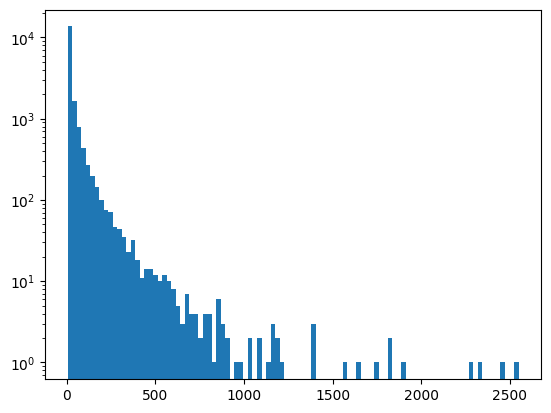

In [133]:
# Podemos ver la cola larga de la frecuencia de palabras
# Incluso habiendo eliminado stopwords e incluso en escala logarítmica
a = plt.hist(doc_freq, bins=100,log=True)
plt.show()

# Clasificación

In [134]:
# Además de los documentos el corpus tiene información de las categorías, por lo que podríamos hacer un ejercicio de clasificación. Sin embargo, vamos a probar hacer ejercicios de clusterización y de Topic Modelling
TNG_train.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [135]:
TNG_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

<Axes: ylabel='Count'>

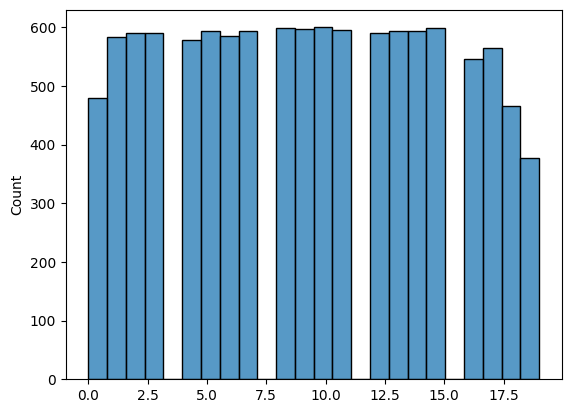

In [214]:
import seaborn as sns
sns.histplot(TNG_train.target)

In [138]:
# El documento 0 es:
TNG_train.data[0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

In [139]:
# Y tiene como tópico el número 7
TNG_train.target[0]

7

In [140]:
# que corresponde a la categoría autos
TNG_train.target_names[7]

'rec.autos'

In [141]:
# El TFIDF del doc 0 con máximo valor es el 3531
TNG_tfidf[0].argmax()

3531

In [142]:
# Que corresponde a la palabra auto!
tfidf.get_feature_names_out()[TNG_tfidf[0].argmax()]

'car'

In [143]:
# Estos son los resultados para los primeros 10 documentos.
# Está bien, pero podría estar mejor.
for doc in range(0,10):
  print(f'{doc}: {TNG_train.target_names[TNG_train.target[doc]]}: {tfidf.get_feature_names_out()[TNG_tfidf[doc].argmax()]}')

0: rec.autos: car
1: comp.sys.mac.hardware: poll
2: comp.sys.mac.hardware: 180
3: comp.graphics: weitek
4: sci.space: std
5: talk.politics.guns: weapons
6: sci.med: thank
7: comp.sys.ibm.pc.hardware: scsi
8: comp.os.ms-windows.misc: icons
9: comp.sys.mac.hardware: board


In [144]:
def letters_only(astr) :
  return astr.isalpha()

In [145]:
import nltk
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer

nltk.download('names')
nltk.download('wordnet')
nltk.download('omw-1.4')

all_names = set(names.words())
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [146]:
# todo a lowercase
data_=[]
for story in TNG_train.data:
    new=story.lower()
    data_.append(new)

In [147]:
TNG_train.data[0]

'I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

In [148]:
data_[0]

'i was wondering if anyone out there could enlighten me on this car i saw\nthe other day. it was a 2-door sports car, looked to be from the late 60s/\nearly 70s. it was called a bricklin. the doors were really small. in addition,\nthe front bumper was separate from the rest of the body. this is \nall i know. if anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.'

In [149]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [173]:
# Hago una limpieza. Eliminar números, shortwords, lemmatizar, hacer stemming, etc...
cleaned=[]
for story in data_:
    words=word_tokenize(story)
    text=""
    for words in word_tokenize(story):
        if (letters_only(words) and len(words)>2):
          #lemma_word=lemmatizer.lemmatize(words)
          #extra=" "+str(lemma_word)
          #text+=extra
          text+=" "+words
    cleaned.append(text)

In [174]:
cleaned[0]

' was wondering anyone out there could enlighten this car saw the other day was sports car looked from the late early was called bricklin the doors were really small addition the front bumper was separate from the rest the body this all know anyone can tellme model name engine specs years production where this car made history whatever info you have this funky looking car please'

In [175]:
TNG_tfidf_cleaned = tfidf.fit_transform(cleaned)

In [176]:
for doc in range(0,10):
  print(f'{doc}: {TNG_train.target_names[TNG_train.target[doc]]}: {tfidf.get_feature_names_out()[TNG_tfidf_cleaned[doc].argmax()]}')

0: rec.autos: car
1: comp.sys.mac.hardware: poll
2: comp.sys.mac.hardware: powerbook
3: comp.graphics: weitek
4: sci.space: bugs
5: talk.politics.guns: weapons
6: sci.med: thank
7: comp.sys.ibm.pc.hardware: burst
8: comp.os.ms-windows.misc: icons
9: comp.sys.mac.hardware: board


# Kmeans

In [177]:
from sklearn.cluster import KMeans

In [178]:
number_of_clusters = 20
TNG_cv_cleaned = cv.fit_transform(cleaned)
kmmodel = KMeans(n_clusters=number_of_clusters)
kmmodel.fit(TNG_cv_cleaned)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=20)

In [179]:
order_centroids = kmmodel.cluster_centers_.argsort()[:, ::-1]
terms = cv.get_feature_names_out()

In [180]:
for i in range(number_of_clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
        plt.show()

Cluster 0:
 bunning
 short
 reds
 louis
 san
 francisco
 cincinnati
 los
 cardinals
 angeles
Cluster 1:
 space
 use
 people
 available
 information
 time
 new
 data
 program
 key
Cluster 2:
 max
 bhj
 giz
 qax
 nrhj
 biz
 ghj
 bhjn
 nuy
 gizw
Cluster 3:
 did
 people
 said
 know
 just
 went
 apartment
 like
 came
 mamma
Cluster 4:
 like
 just
 people
 does
 know
 think
 use
 time
 did
 good
Cluster 5:
 god
 jesus
 atheists
 does
 matthew
 people
 believe
 atheism
 religious
 religion
Cluster 6:
 max
 giz
 bhj
 fij
 nrhj
 rlk
 qax
 fyn
 biz
 nuy
Cluster 7:
 anonymous
 internet
 privacy
 information
 email
 anonymity
 use
 posting
 mail
 service
Cluster 8:
 jpeg
 image
 file
 gif
 images
 format
 quality
 version
 files
 free
Cluster 9:
 file
 gun
 control
 states
 firearms
 united
 house
 handgun
 amendment
 january
Cluster 10:
 widget
 application
 resource
 type
 value
 converter
 visual
 data
 set
 widgets
Cluster 11:
 stephanopoulos
 president
 going
 know
 think
 said
 administratio

# NMF

In [181]:
from sklearn.decomposition import NMF

In [182]:
d=20  # num topics
cv = CountVectorizer(ngram_range=(1,1), max_df=0.8, min_df=2, max_features=None, stop_words="english")
TNG_cv_cleaned = cv.fit_transform(cleaned)
nmf = NMF(n_components=d, random_state=1).fit(TNG_cv_cleaned)

In [183]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [184]:
display_topics(nmf, feature_names=cv.get_feature_names_out(),  no_top_words=20)

Topic 0:
max bhj giz qax nrhj biz ghj nuy bhjn gizw wwiz rlk fyn fij nriz vmk qtm mdi mtm air
Topic 1:
available widget window version server use subject set data information motif application software program sun display using resource ftp file
Topic 2:
did said people know went just came apartment say like armenians says told going mamma started time took saw armenian
Topic 3:
output file oname printf stream program char entry buf fprintf return filename uuencode int contest line stderr write section null
Topic 4:
file gun control firearms states united house handgun amendment crime january law directory american senate use amend journal second march
Topic 5:
internet anonymous privacy information email mail anonymity use computer electronic users network posting address encryption usenet security access user service
Topic 6:
stephanopoulos president know going think said did package groups george does working just time mean vat tax jobs yes press
Topic 7:
hockey league nhl team new 

In [185]:
# Una ventaja del NMF sobre LDA es que puedo pasarle el TFIDF
tfidf = TfidfVectorizer(ngram_range=(1,1), max_df=0.8, min_df=2, max_features=None, stop_words="english")
TNG_cv_cleaned = tfidf.fit_transform(cleaned)
nmf_tfidf = NMF(n_components=d, random_state=1).fit(TNG_cv_cleaned )

In [186]:
display_topics(nmf_tfidf, feature_names=cv.get_feature_names_out(),  no_top_words=20)

Topic 0:
people think right government gun make say point law guns believe state person rights want good life things way case
Topic 1:
space nasa data information program launch shuttle list available research orbit station science lunar moon earth article technology center university
Topic 2:
god jesus bible believe faith christ christian christians life church heaven hell say lord sin truth man belief love christianity
Topic 3:
drive scsi drives hard disk ide controller floppy boot tape internal bus seagate quantum cable bios external meg mac motherboard
Topic 4:
key chip encryption clipper keys government escrow algorithm secure security nsa phone encrypted law number chips des secret enforcement privacy
Topic 5:
thanks advance looking info email address help information appreciated post mail send appreciate anybody hello reply need list interested lot
Topic 6:
geb chastity shameful intellect skepticism surrender gordon banks soon lyme blood patients weight medical probably usually 

# LDA

In [187]:
from sklearn.decomposition import LatentDirichletAllocation

In [188]:
lda = LatentDirichletAllocation(n_components=20, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(TNG_cv_cleaned)

In [189]:
display_topics(lda, feature_names=cv.get_feature_names_out(), no_top_words=20)

Topic 0:
printer version drivers current substitution roberts mvp windows doug hill callbacks ver driver ken reinforcement dialog flow print let newer
Topic 1:
manta kadett chevrolet lemans acne indy overdose mearly hwang hyperactivity spdcc rayssd linus ima clearasil scopes ibuprofen dyer cars appeared
Topic 2:
bleah intermittently mitteilungsblatt gesselschaft admonition sam thanx advance wallpaper orders motto image anybody icons yankee thanks western gifs circuits ranger
Topic 3:
bos det pit chi tor que cal stl nyi buf nyr van phi edm mtl ott pittsburg min ahf pitt
Topic 4:
smileys cindy parametric maureen tittle tog smarter derose lobotomy munge cusps jug characterizing origonal aided cubic curves xerox geometric razor
Topic 5:
max bhj rig omran giz sidecar rednecks steelers dirtbike jur rmw goggles qax nrhj mmw ajw fij aoj biz jvw
Topic 6:
resumed slimy levitical mattress suresh rushdie scriptural violation tactic fatwa yrs irrelevant legitimately searching jews priesthood disks 

In [190]:
# Puedo hacer la transformación de manera de obtener para cada uno de los 11314 documentos, la probabilidad de pertenencia a cada uno de los 20 topics
TNG_topics_lda = lda.transform(TNG_cv_cleaned)

In [191]:
TNG_topics_lda.shape

(11314, 20)

In [192]:
# Por ejemplo, esta es la probabilidad de pertenencia del documento 0 a cada uno de los topics.
# Es decir, que no le asignó un cluster, sino que este documento está más cercano a uno u otro topic
TNG_topics_lda[0]

array([0.0085087 , 0.0085087 , 0.0085087 , 0.0085087 , 0.0085087 ,
       0.0085087 , 0.0085087 , 0.05482173, 0.0085087 , 0.0085087 ,
       0.79202168, 0.0085087 , 0.0085087 , 0.0085087 , 0.0085087 ,
       0.0085087 , 0.0085087 , 0.0085087 , 0.0085087 , 0.0085087 ])

In [209]:
import pandas as pd
topics=pd.DataFrame(TNG_topics_lda)
topics['max']=TNG_topics_lda.argmax(axis=1)+1

In [210]:
topics

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,max
0,0.008509,0.008509,0.008509,0.008509,0.008509,0.008509,0.008509,0.054822,0.008509,0.008509,...,0.008509,0.008509,0.008509,0.008509,0.008509,0.008509,0.008509,0.008509,0.008509,11
1,0.007075,0.007075,0.007075,0.007075,0.007075,0.007075,0.007075,0.007075,0.007075,0.007075,...,0.007075,0.007075,0.371910,0.007075,0.007075,0.007075,0.007075,0.007075,0.007075,11
2,0.004755,0.004755,0.004755,0.004755,0.004755,0.004755,0.004755,0.004755,0.004755,0.004755,...,0.004755,0.004755,0.341126,0.004755,0.004755,0.004755,0.004755,0.004755,0.004755,11
3,0.016288,0.016288,0.016288,0.016288,0.016288,0.016288,0.016288,0.016288,0.016288,0.016288,...,0.016288,0.016288,0.690530,0.016288,0.016288,0.016288,0.016288,0.016288,0.016288,14
4,0.008462,0.008462,0.008462,0.008462,0.008462,0.008462,0.008462,0.008462,0.008462,0.008462,...,0.008462,0.008462,0.340641,0.008462,0.008462,0.008462,0.008462,0.008462,0.008462,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11309,0.005762,0.005762,0.005762,0.005762,0.005762,0.005762,0.005762,0.005762,0.037166,0.005762,...,0.005762,0.005762,0.005762,0.005762,0.005762,0.005762,0.005762,0.005762,0.005762,11
11310,0.007377,0.007377,0.007377,0.007377,0.007377,0.007377,0.007377,0.007377,0.007377,0.007377,...,0.007377,0.007377,0.700395,0.007377,0.007377,0.007377,0.007377,0.007377,0.007377,14
11311,0.009781,0.009781,0.009781,0.009781,0.009781,0.009781,0.009781,0.009781,0.009781,0.009781,...,0.009781,0.009781,0.458412,0.009781,0.009781,0.009781,0.009781,0.009781,0.009781,14
11312,0.010341,0.010341,0.010341,0.010341,0.010341,0.010341,0.010341,0.010341,0.010341,0.010341,...,0.010341,0.010341,0.010341,0.010341,0.010341,0.010341,0.010341,0.010341,0.010341,11


<Axes: xlabel='max', ylabel='Count'>

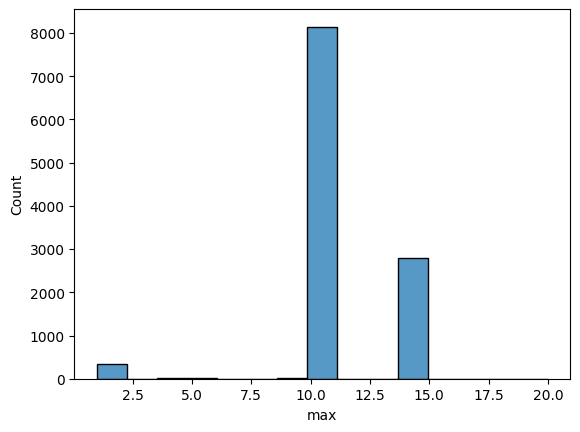

In [213]:
sns.histplot(topics['max'])

In [224]:
topics[topics['max']==4]

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,max
1492,0.004693,0.004693,0.004693,0.831800,0.004693,0.004727,0.004693,0.004693,0.004693,0.004693,...,0.004693,0.004693,0.018145,0.004693,0.004693,0.004693,0.004693,0.023407,0.004693,4
1541,0.004614,0.004614,0.004614,0.868185,0.004614,0.004614,0.004614,0.004614,0.004614,0.004614,...,0.004614,0.004614,0.015432,0.004614,0.004614,0.004614,0.004614,0.004614,0.004614,4
1988,0.011447,0.011447,0.011447,0.536395,0.011447,0.011447,0.011447,0.011447,0.011447,0.011447,...,0.011447,0.011447,0.011447,0.011447,0.011447,0.011447,0.011447,0.011447,0.011447,4
4073,0.015709,0.015709,0.015709,0.496827,0.015709,0.015709,0.015709,0.015709,0.015709,0.015709,...,0.015709,0.015709,0.015709,0.015709,0.015709,0.015709,0.015709,0.015709,0.015709,4
5634,0.008872,0.008872,0.008872,0.784367,0.008872,0.008872,0.008872,0.008872,0.008872,0.008872,...,0.008872,0.008872,0.008872,0.008872,0.008872,0.008872,0.008872,0.008872,0.008872,4
7003,0.008872,0.008872,0.008872,0.784367,0.008872,0.008872,0.008872,0.008872,0.008872,0.008872,...,0.008872,0.008872,0.008872,0.008872,0.008872,0.008872,0.008872,0.008872,0.008872,4
8213,0.005899,0.005899,0.005899,0.447547,0.005899,0.314855,0.005899,0.005899,0.005899,0.005899,...,0.005899,0.005899,0.005899,0.005899,0.005899,0.005899,0.005899,0.032271,0.005899,4
10275,0.004923,0.004923,0.004923,0.783786,0.004923,0.004923,0.004923,0.004923,0.004923,0.004923,...,0.004923,0.004923,0.067045,0.004923,0.004923,0.004923,0.004923,0.004923,0.004923,4


In [228]:
TNG_train.data[1492]

'\n------------ Part 3 of 14 ------------\nM"`@("`@("`@("`@("`@(G.3DY.3DY.3DY.3DY.3DY.3DY.3DY.2#IJ:FIJ:F\nM@^3DY.3DG.OKZZNKJZOKZYSDY.2#IJ9$B-RYB(C<$!"(H#YM.LISRG-SV#HZ\nMRG/8<]C*<VW8.MC8V#K*RLIS.M@Z<]C*<]C8V,HZ.FW*.MAM<W-S<W,Z<\\IM\nM;<J6<]@\\RD%M<\\IM"`@("`@("`@("`@```""$Q."`"MAFYN;/JZ(N;G<B*Z@\nM/IN;"I\\7]1>?@0H*FYN;FSX^/J"@KJZNB(C<N;FYN;:VN;FYN;FYN;FY/#Q%\nMW3S==]W1W3S=17?=/$5%=]UW147117?=W7?==W=W=]W=T7=WW=W==X6%W=UW\nM0(5`0-W==W?==X710-W=A4!WW=V%A=W==]U`2=U)=]UW=W=W=]U`W2/=A85W\nM0-W=A=V%W=%`T=UW0\'?=T87=T7=W=T"%=W=WT=\'==W=WA=W1T7?=A=\'=W=%W\nM1=W=W7<\\T=W=W44\\/-$\\1=W=W=U%=T5%T=W1W=W=T3P\\/-W=/#S=T3Q%/-$\\\nM/-%%T=$\\W3S1/-\'=/-U%W3Q%1=W=W=W=/-W=/$71/-T\\W=T\\W45WW45%W=W1\nMT3Q%W7?=1=U%/$7=W=%WT=T\\147=145%144\\1=\'1145W/-%%/$5%W471T3QW\nM=]\'=T3P\\W3S=/-W=W7<\\/\'=%/#P\\/#S=W=W=/#P\\T=W113S=/-\'=/$5%/$4\\\nM13P\\T3S=17-%<Y9%T=$\\199SEI;1/$5S17-%<W-M<]B6EMB6ECS*<W/*V\',\\\nMV-AMV,ISV,K*V&US/,IID89I.I&1:<<OQ\\>1D88OD6F1RI\'*D<HZRCJ1.LK*\nMD<K*V)\'*V#K8.LK*V,HZV-C*;3J1.CK8+R_8V$$O

In [229]:
TNG_train.data[1541]

'\n------------ Part 2 of 14 ------------\nM0./CXT!)27M)X^-)X^/CBN/C24E[X^.*X^/CX^.*X^,RBN.*,HKC,GOC,N-[\nMBC)[XS(R6\'OC3C)[>XJ*,EA.BN>*>S+GBE@R6(KSYXKSBHI86$Y.Y^<R\\_-8\nMY_/SYS*/CT[S\\X_S3N>/C^>/CX_S\\UA.Y_/SC_./C_-8C_./C_/GCX^/Y_./\nM\\X_SCX^/\\_./C_/S\\_./\\X^/\\X^/CX_SCX^/C_./CX^/\\X^/C_./CX^/CX^/\nM\\X^OC_./\\X^/C_./CX_SCX_S\\X^/\\_./CX^/\\X_SCX_SCX^/CX^/CX^/C_./\nMCX^/CX_SCX^/C_./CX\\ORI&1RI$Z0<K*D2\\O.MC8.CK*.D$ZRCK*V#I!V,IM\nM;<K*.CK*;3HZ0=C8V&UMV,K*RCHZ.MC8;7/*RG-!RCK8.LIS.FW8V#K*;3I!\nM.LHZ.CHO+T$Z.CK*+SIMRCK8+T\'*.CI!V,K*V#HOD9&1.CHO+SHZ08;*.CHZ\nM:9$ZAI$Z+SHZAD$ORI$Z.B\\ZQR^&:6EIACK\'D9&1+SHZQY&&D9&1:2^1:2_\'\nMAL<OQR_\'D<>1QX;\'D89IQ\\>1D;^&:<?\'QY&&QY$U:6G\'QVF1:<=I:89IAK_\'\nMQ\\?\'Q\\?\'QY&1O[^&QX:1AI\'\'QR^&+X;\':2\\O:<=IQVG\'AFG\'D8:1D<=I.B^1\nM:9%I+X8Z:6E!+X8ZRI$Z.LHOAH8Z.CHO+Y&109\'8.CHZ.CK*+\\K8V,K*<\\K8\nM<]C*<VW803IS<Y9S<\\K*;<IS/-C*/)9S<]AS/#QMV#R6V-AS;99S<Y:6/#P\\\nM/$4\\ECQ%/\'-ST3P\\/#Q%<SS1T3P\\<]\'1ED66W=\'1/#S=T471W=W1/#Q%/-W=\nM13Q%W=U%13P\\T45%/-\'=W=W1